# Exercícios: Visualização de Dados

#### Carga da Base de Dados Indicadores Criminais de Porto Alegre

In [3]:
import pandas as pd
from pandas import DataFrame

arquivo = './data/df_crimesRS.json'

df_crimes = pd.read_json(arquivo)
df_crimes = df_crimes.drop(columns=['index','Total de vítimas de Homicidio Doloso','Vítimas de Latrocínio'])

df_poa = df_crimes[df_crimes['Municípios']=='PORTO ALEGRE'].drop(columns=['Municípios'])
df_poa = df_poa.pivot(index=['ano'],columns=[],values=df_poa.columns.to_list()[:-1])
df_poa = df_poa.reset_index()
df_poa['ano']=df_poa['ano'].astype('object')
df_poa['Total/Ano'] = df_poa.sum(axis=1)
df_poa = df_poa.set_index('ano')
df_poa = df_poa.sort_index()
df_poa

,Homicídio Doloso,Latrocínio,Furtos,Abigeato*,Furto de Veículo,Roubos,Roubo de Veículo,Estelionato,Delitos Relacionados à Armas e Munições,Entorpecentes - Posse,Entorpecentes - Tráfico,Vítimas de Lesão Corp. Seg. Morte,Total/Ano
ano,,,,,,,,,,,,,
2012,473,13,33836,108,3591,15952,6140,5367,886,1883,2957,2,73220
2013,463,25,35957,83,3913,19311,6489,5179,938,2043,3084,4,79502
2014,583,25,37672,90,4081,24487,6936,5378,1021,1575,2839,3,86704
2015,607,34,33157,66,4203,31376,9480,4862,1064,1156,2434,3,90457
2016,723,40,30269,82,3657,35104,8119,4507,1025,1050,2088,2,88682
2017,594,13,28130,91,3104,34919,8422,5440,911,1889,1992,5,87527
2018,466,13,26680,45,2957,30307,8211,6116,843,1475,2144,2,81277
2019,292,13,27387,42,2809,27918,4747,7245,605,1712,2333,1,77123
2020,260,10,19677,37,1872,19704,3341,15474,669,1458,2446,5,66973


#### Visualização de Dados - Gráficos de Linha

Utilizando o método plot() do Pandas, gere um gráfico de linha para exibir o total de crimes / ano presentes referentes à cidade de Porto Alegre.<br>
Inclua o título 'POA: Crimes Registrados x Ano'.
Se necessário, consulte a documentação do método plot(), no endereço: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<Axes: title={'center': 'POA: Crimes Registrados x Ano'}, xlabel='ano'>

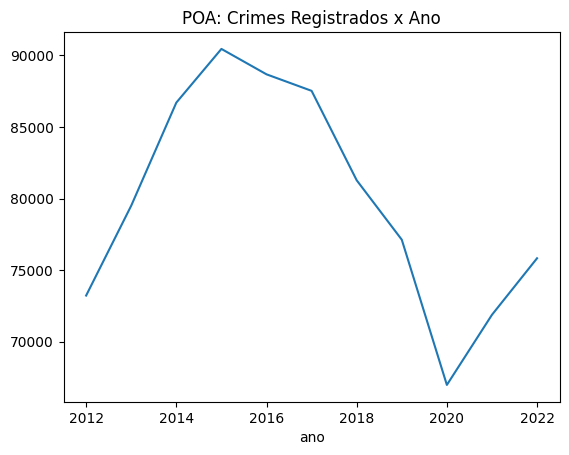

In [4]:
df_poa['Total/Ano'].plot(title='POA: Crimes Registrados x Ano')

Gere o mesmo tipo gráfico mostrando, ao mesmo tempo, a evolução dos crimes:  estelionato, furto e roubo de veículos.

<Axes: title={'center': 'POA: Crimes Registrados x Ano'}, xlabel='ano'>

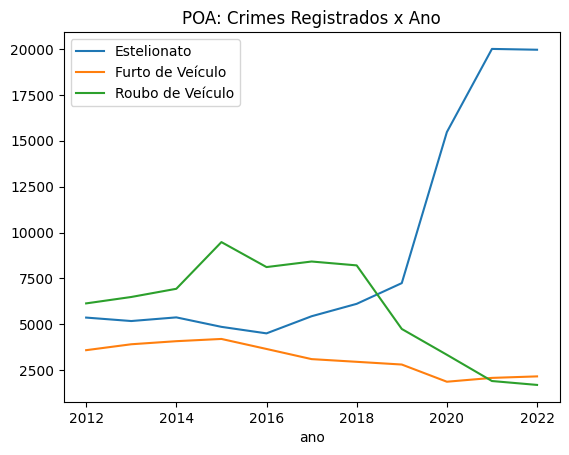

In [5]:
df_poa[[ 'Estelionato','Furto de Veículo','Roubo de Veículo'] ].plot(title='POA: Crimes Registrados x Ano')

#### Visualização de Dados - Subgráficos de Linha

O método DataFrame.plot() permite, com um único comando, criar um gráfico com vários subgráficos para melhor visualização dos dados.<br>
Crie um gráfico de linha combinado, mostrando a evolução de cada um dos 16 tipos de crimes registrados na base, em seu próprio subgráfico.<br>
Exclua a coluna "Total/Ano" e utilizer um parâmetro figsize grande o suficiente, como figsize=(20,20).

array([[<Axes: xlabel='ano'>, <Axes: xlabel='ano'>, <Axes: xlabel='ano'>,
        <Axes: xlabel='ano'>],
       [<Axes: xlabel='ano'>, <Axes: xlabel='ano'>, <Axes: xlabel='ano'>,
        <Axes: xlabel='ano'>],
       [<Axes: xlabel='ano'>, <Axes: xlabel='ano'>, <Axes: xlabel='ano'>,
        <Axes: xlabel='ano'>],
       [<Axes: xlabel='ano'>, <Axes: xlabel='ano'>, <Axes: xlabel='ano'>,
        <Axes: xlabel='ano'>]], dtype=object)

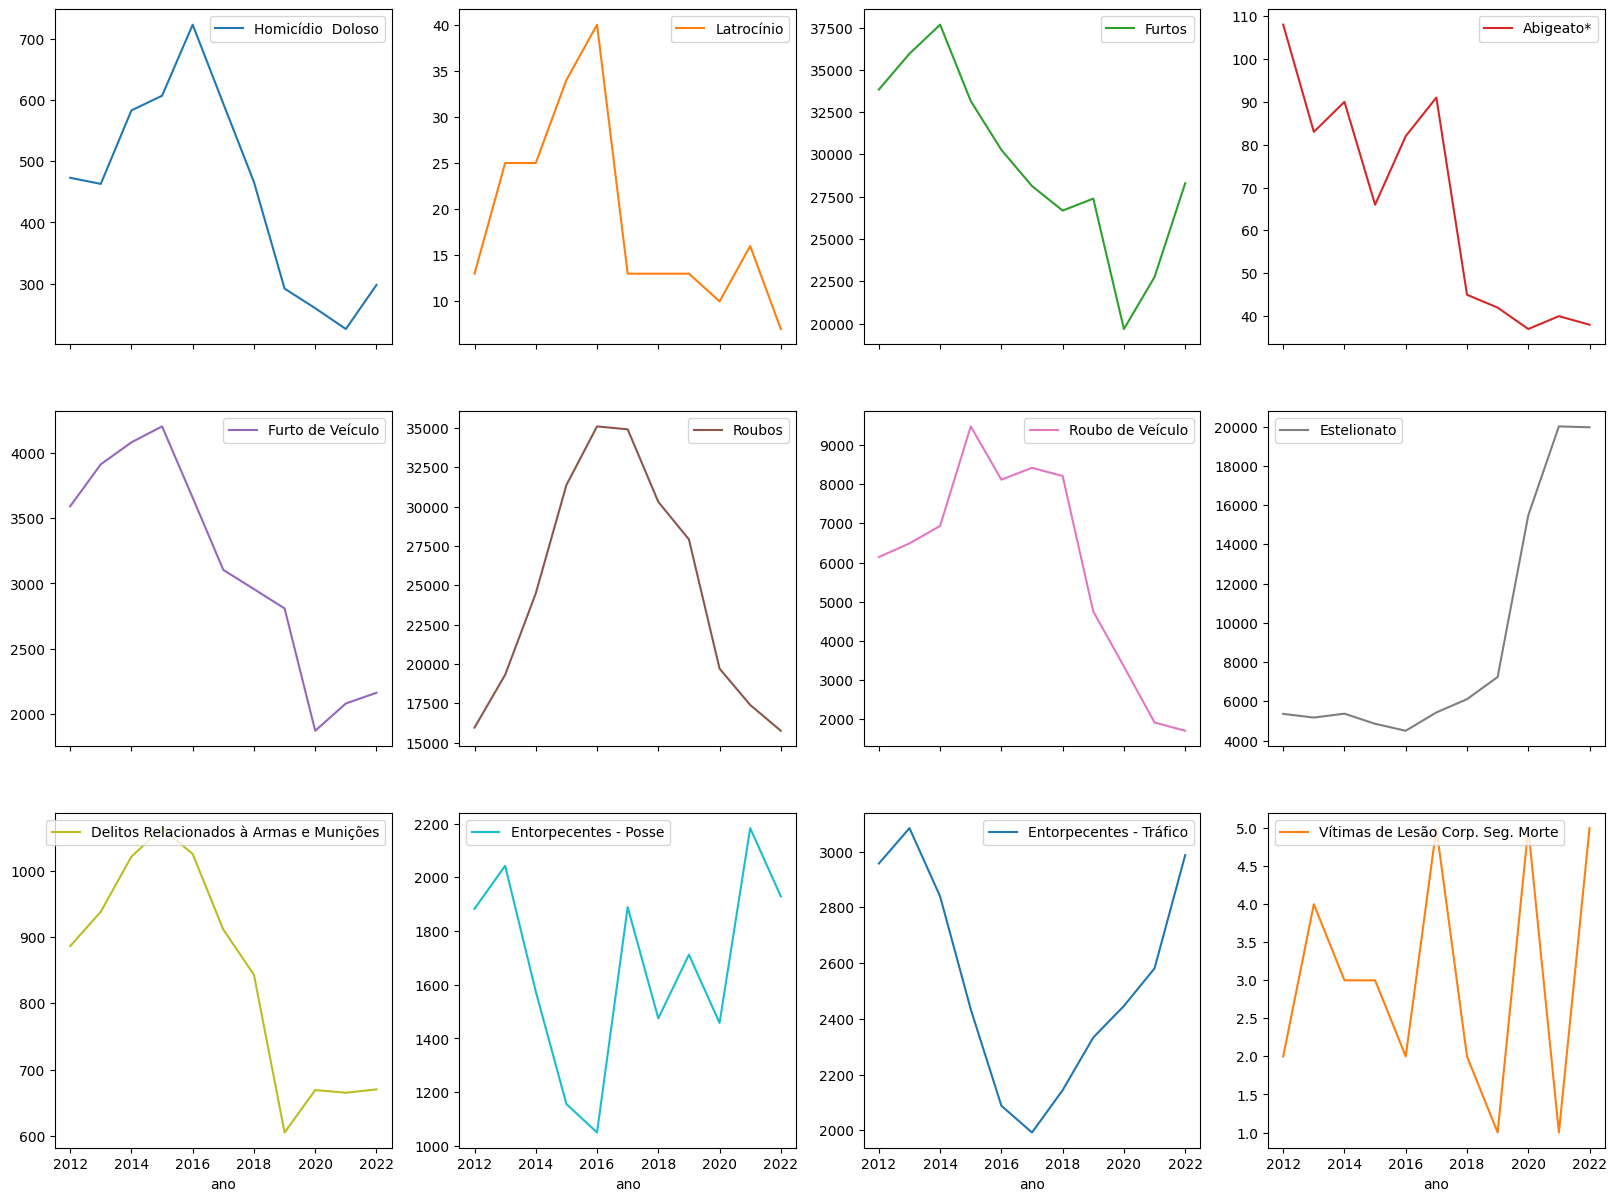

In [20]:
df_poa[df_poa.columns[:-1]].plot(subplots=True,layout=(4,4),figsize=(20,20))

#### Visualização de Dados - Gráfico de Pizza

A partir do DataFrame df_poa, crie um novo DataFrame contendo a soma de crimes por tipo considerados todos os anos.
Lembre-se de remover a coluna Total/Ano e ordene pela soma.

In [7]:
total_crime = DataFrame(df_poa[df_poa.columns[:-1]].sum(axis=0),columns=['Quantidade']).sort_values('Quantidade')

Gere um gráfico de pizza ('pie chart') utilizando o método plot() do DataFrame, utilizando o parâmetro 'kind'.<br>
Utilize o parâmetro figsize=(8,8) para melhorar a legibilidade do gráfico.<br>
Se necessário, consulte a documentação do método plot(), no endereço: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<Axes: ylabel='Quantidade'>

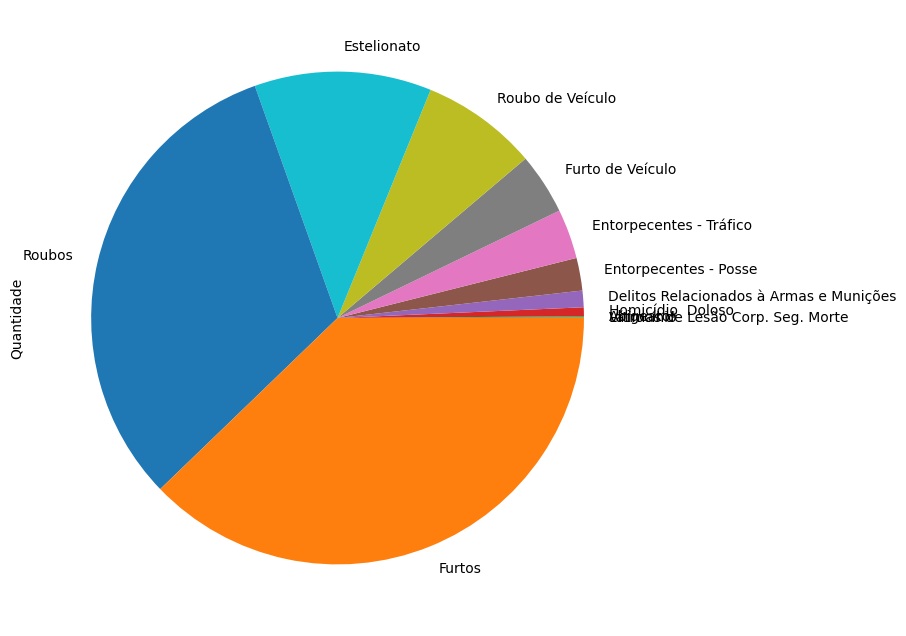

In [8]:
total_crime.plot(kind='pie',y='Quantidade',figsize=(8,8),legend=False)

#### Carga Base de Dados: Taxa de Homicídios x População

Nesse exercício, utilizaremos a base de dados do Estado do Rio Grande do Sul para avaliar a relação entre a taxa de homicídios e o tamanho da população dos municípios.<br>

In [9]:
df_hompop = pd.read_json('./data/df_homicidios_populacao.json',date_unit='s')[['Total/Município','População']]
df_hompop = df_hompop.rename(columns={'Total/Município':'Homicídios'})
df_hompop['Taxa de Homicídios']=df_hompop['Homicídios']/df_hompop['População']
df_hompop.head()

C:\Users\bootcamp_enap\AppData\Local\Temp\ipykernel_304\3416710866.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_hompop = pd.read_json('./data/df_homicidios_populacao.json',date_unit='s')[['Total/Município','População']]


,Homicídios,População,Taxa de Homicídios
ACEGUA,5,4170.0,0.001199
AGUA SANTA,2,3912.0,0.000511
AGUDO,11,16039.0,0.000686
AJURICABA,2,6720.0,0.000298
ALECRIM,9,6123.0,0.001470


Faça um gráfico de dispersão (scatter plot) com as variáveis Taxa de Homicídios x População.
Se necessário, consulte a documentação do método plot(), no endereço: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<Axes: xlabel='População', ylabel='Taxa de Homicídios'>

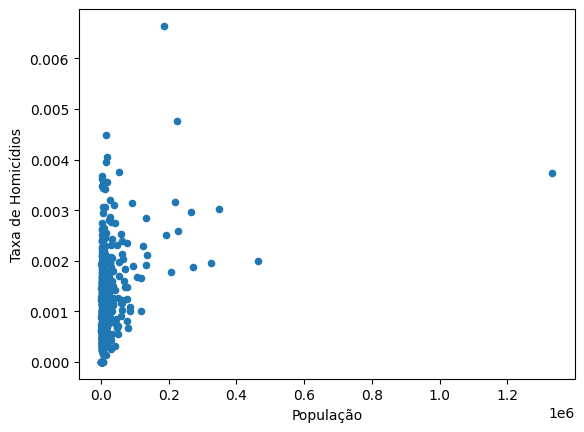

In [10]:
df_hompop.plot(kind='scatter',x='População',y='Taxa de Homicídios')

Utilizando o a função regplot do módulo Seaborn, gere um gráfico de dispersão com a linha da regressão linear utilizando os mesmos dados.<br>
O que a inclinação da linha sugere em relação à relação entre o tamanho da população e a taxa de homicídios?

<Axes: xlabel='População', ylabel='Taxa de Homicídios'>

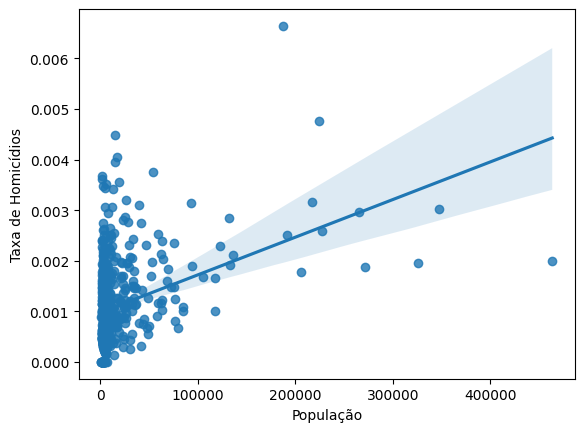

In [22]:
import seaborn as sns
sns.regplot(data=df_hompop[df_hompop.index!='PORTO ALEGRE'],x='População', y='Taxa de Homicídios',fit_reg=True,scatter=True)

Utilizando o método plot() do DataFrame, crie um gráfico de caixa (box plot) da Taxa de Homicídios.<br>

<Axes: >

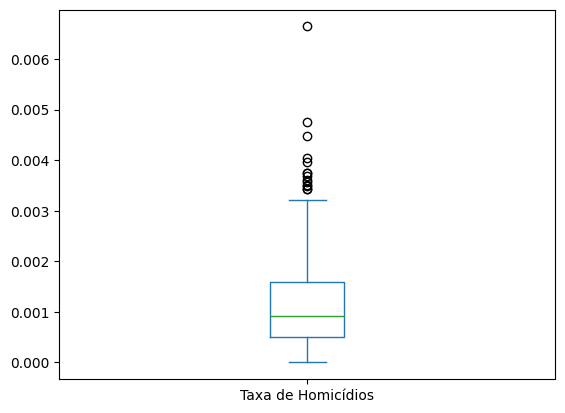

In [12]:
df_hompop['Taxa de Homicídios'].plot(kind='box')

O gráfico indica que, nesse cenário, uma taxa de homicídios maior que 0.002 é algo atípico.<br>
Crie uma nova coluna no DataFrame para indicar tratar-se de um município com taxa de homicídios atípica e liste os 10 municípios desse grupo com a maior população.

In [13]:
df_hompop['Atípico']=df_hompop['Taxa de Homicídios']>0.002
df_hompop[df_hompop.Atípico].sort_values('População', ascending=False)[0:10]

,Homicídios,População,Taxa de Homicídios,Atípico
PORTO ALEGRE,4985,1332570.0,0.003741,True
CANOAS,1052,347657.0,0.003026,True
GRAVATAI,785,265070.0,0.002961,True
NOVO HAMBURGO,591,227732.0,0.002595,True
VIAMAO,1066,224116.0,0.004756,True
SAO LEOPOLDO,688,217410.0,0.003165,True
RIO GRANDE,483,191900.0,0.002517,True
ALVORADA,1244,187315.0,0.006641,True
CACHOEIRINHA,288,136258.0,0.002114,True
SAPUCAIA DO SUL,377,132107.0,0.002854,True


Como na aula, utilize a função lmplot() do Seaborn para plotar o gráfico de dispersão da taxa de homicídio x tamanho da população separando entre municípios típicos e atípicos.<br>
Se necessário, consulte a documentação do sem https://seaborn.pydata.org/generated/seaborn.lmplot.html

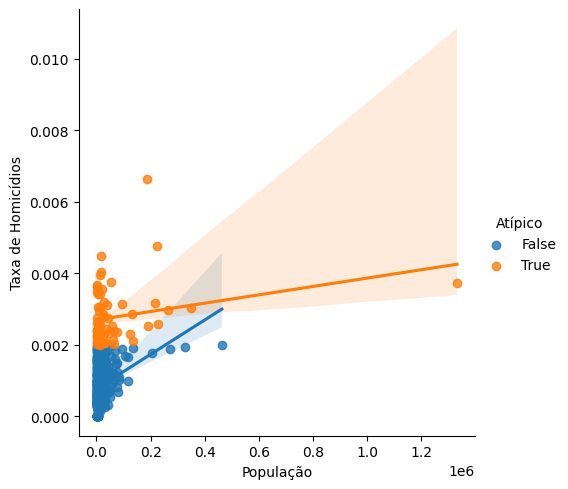

In [23]:
sns.lmplot(data=df_hompop,
               x='População', y='Taxa de Homicídios', hue='Atípico')